In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("flight_data.csv")

In [3]:
df.info()
# Columns having NULLs: dep_time, dep_delay, arr_time, arr_delay, tailnum, air_time, 
# These variables require cleanup

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [4]:
# Find count of missing values for each column
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [5]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [6]:
# Only dep_delay,arr_delay,air_time,distance are Numerical. 
# Rest are categorical, hence mean etc statistics won't matter for them.
df.loc[:, ["dep_delay","arr_delay","air_time","distance","flight"] ].describe()

,dep_delay,arr_delay,air_time,distance,flight
count,328521.000000,327346.000000,327346.000000,336776.000000,336776.000000
mean,12.639070,6.895377,150.686460,1039.912604,1971.923620
std,40.210061,44.633292,93.688305,733.233033,1632.471938
min,-43.000000,-86.000000,20.000000,17.000000,1.000000
25%,-5.000000,-17.000000,82.000000,502.000000,553.000000
50%,-2.000000,-5.000000,129.000000,872.000000,1496.000000
75%,11.000000,14.000000,192.000000,1389.000000,3465.000000
max,1301.000000,1272.000000,695.000000,4983.000000,8500.000000


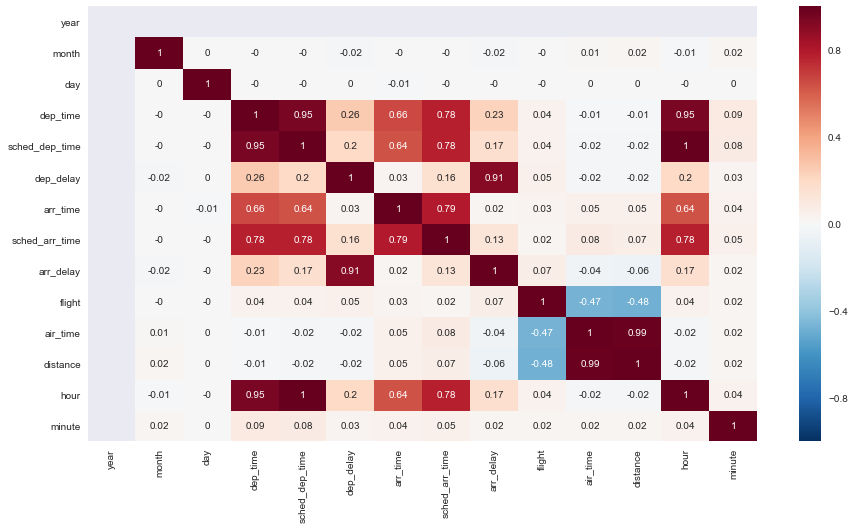

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap( round(df.corr(),2), annot=True);

# The only useful takeaway: air_time & distance are 99% correlated. Must be taken into account to estimate air_time

# Data Clean-Up

## variables require cleanup: dep_time, dep_delay, arr_time, arr_delay, tailnum, air_time, 

air_time can be computed from distance using regression like analysis

In [8]:
dist_airTime_lookup = df.groupby("distance").air_time.mean().to_frame().round()
dist_airTime_lookup

,air_time
distance,
17,NaN
80,29.0
94,31.0
96,37.0
116,25.0
143,32.0
160,33.0
169,37.0
173,36.0


In [9]:
#Fill air_time based on distance
airTime_missing_idx = df.air_time.isnull()
airTime_toFill = dist_airTime_lookup.loc[df.distance].reset_index()[airTime_missing_idx].air_time

df.loc[airTime_missing_idx, "air_time"] = airTime_toFill


#### dep_time & arr_time : Any one can compute other



In [10]:
np.sum( df["arr_time"].isnull() & df["dep_time"].notnull() )  # 458: So arr_time can be filled using dep_time. Better to estimate rest of dep_time first.
np.sum( df["arr_time"].notnull() & df["dep_time"].isnull() )  # 0: So dep_time cannot be filled

458

0



## Phase-2: Use estimates to fill missing data

### Create Pivot table to understand distribution of dep_delay


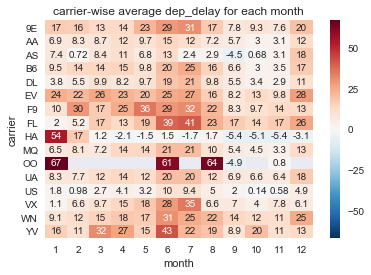

In [11]:
df_pvtble = df.pivot_table(index="carrier", columns="month", values="dep_delay") 
sns.heatmap(df_pvtble, annot=True)       #carrier-wise average dep_delay for each month
plt.title("carrier-wise average dep_delay for each month");


#### Use above derived avg delays to fill the missing dep_delays

In [12]:
na_idx = df.dep_delay.isnull()
fill_NA = np.diag( df_pvtble.loc[df.carrier[na_idx], df.month[na_idx]] )
df.loc[na_idx, "dep_delay"] = fill_NA

### Now dep_time & arr_time can be computed

In [13]:
def add_delay_to_HHMM(HHMM, delay):
    t = (HHMM//100)*60+(HHMM%100) + round(delay)
    t[ t>24*60 ] -= 24*60
    t[ t<0 ] += 24*60
    return (t//60)*100 + t%60

In [14]:
na_idx = df.dep_time.isnull()
df.loc[na_idx, "dep_time"] = add_delay_to_HHMM(df.sched_dep_time, df.dep_delay)[na_idx]

In [15]:
na_idx = df.arr_time.isnull()
df.loc[na_idx, "arr_time"] = add_delay_to_HHMM(df.dep_time, df.air_time)[na_idx]

<b> Finally find arr_delay </b>

In [16]:
def HHMM_to_Minutes(HHMM):
    return (HHMM//100) * 60 + (HHMM%100)

def HHMM_diff_inMinutes(x1 , x2, ref):
    """ Perform x1-x2    (both are in HHMM format)
        But what-if date changes? (x1-x2) will be big +ve or big -ve.
        Compare (x1-x2) with "ref" to check whether big is really invalid. If so, do correction."""
    x_diff = HHMM_to_Minutes(x1) - HHMM_to_Minutes(x2)
    # If date changes, this will become large -ve or +ve which is not correct. Correct below
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    abs(x_diff - ref).hist()    # 23 hrs of deviation found, which is anomaly & indicative of date change
    plt.title("Initial Deviations w.r.t. Reference (absolute)")
    plt.xlabel("Absolute Deviation BINS")
    anomaly_neg = (  (x_diff - ref) < -600  )
    x_diff[anomaly_neg] += 1440

    anomaly_postiv = (    (x_diff - ref) > 600  )
    x_diff[anomaly_postiv] -= 1440

    x_diff.describe()
    plt.subplot(1,2,2)
    abs(x_diff - ref).hist()
    plt.title("Adjusted Deviations w.r.t. Reference (absolute)")
    return x_diff


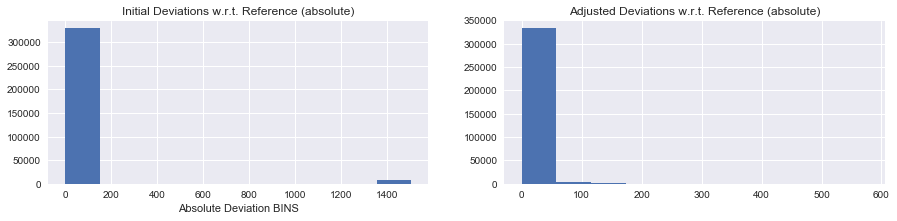

In [17]:
na_idx = df.arr_delay.isnull()
df.loc[na_idx, "arr_delay"] = HHMM_diff_inMinutes(df.arr_time, df.sched_arr_time, df.dep_delay)[na_idx]

In [18]:
df.isnull().sum()
# Clean-up finished

year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             1
sched_arr_time       0
arr_delay            1
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time             1
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [19]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,336776.000000,336776.000000,336776.000000,336775.000000,336776.000000,336775.000000,336776.000000,336775.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1353.169507,1344.254840,12.726444,1505.942947,1536.380220,7.245063,1971.923620,149.640347,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.046615,467.335756,39.738848,532.652636,497.457142,45.513698,1632.471938,93.339238,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-322.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,910.000000,906.000000,-5.000000,1107.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1407.000000,1359.000000,-1.000000,1540.000000,1556.000000,-5.000000,1496.000000,128.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1747.000000,1729.000000,12.000000,1943.000000,1945.000000,14.000000,3465.000000,190.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


In [34]:
df.to_csv("flight_data_cleaned.csv")